In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
cars_data = pd.read_csv('cars_data.csv')

In [4]:
cars_data

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,3/4/2016 0:00,29690,5/4/2016 15:16
49997,27/03/2016 14:55,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,27/03/2016 0:00,50181,7/4/2016 11:45
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,15/03/2016 0:00,65232,6/4/2016 17:15


In [5]:
cars = cars_data.copy()

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
dateCrawled            50001 non-null object
name                   50001 non-null object
seller                 50001 non-null object
offerType              50001 non-null object
price                  50001 non-null int64
abtest                 50001 non-null object
vehicleType            44813 non-null object
yearOfRegistration     50001 non-null int64
gearbox                47177 non-null object
powerPS                50001 non-null int64
model                  47243 non-null object
kilometer              50001 non-null int64
monthOfRegistration    50001 non-null int64
fuelType               45498 non-null object
brand                  50001 non-null object
notRepairedDamage      40285 non-null object
dateCreated            50001 non-null object
postalCode             50001 non-null int64
lastSeen               50001 non-null object
dtypes: int64(6), object(13)
memory usage:

In [7]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [8]:
pd.set_option('display.float_format',lambda x : '%.3f'%x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [9]:
pd.set_option('display.max_columns',500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [10]:
#Huge difference between mean and the median of price column
#This means that price is very very skewed 

In [11]:
print(cars.shape)
cols = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns=cols,axis =1)

(50001, 19)


In [12]:
cars.shape

(50001, 14)

In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 14 columns):
seller                 50001 non-null object
offerType              50001 non-null object
price                  50001 non-null int64
abtest                 50001 non-null object
vehicleType            44813 non-null object
yearOfRegistration     50001 non-null int64
gearbox                47177 non-null object
powerPS                50001 non-null int64
model                  47243 non-null object
kilometer              50001 non-null int64
monthOfRegistration    50001 non-null int64
fuelType               45498 non-null object
brand                  50001 non-null object
notRepairedDamage      40285 non-null object
dtypes: int64(5), object(9)
memory usage: 5.3+ MB


In [14]:
cars.drop_duplicates(keep="first",inplace=True)

In [15]:
cars.shape

(49531, 14)

In [16]:
#DATA CLEANING

cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [17]:
yearwise_count = cars['yearOfRegistration'].value_counts().sort_index()
print(sum(cars['yearOfRegistration'] > 2020))
print(sum(cars['yearOfRegistration'] < 1950))

24
38


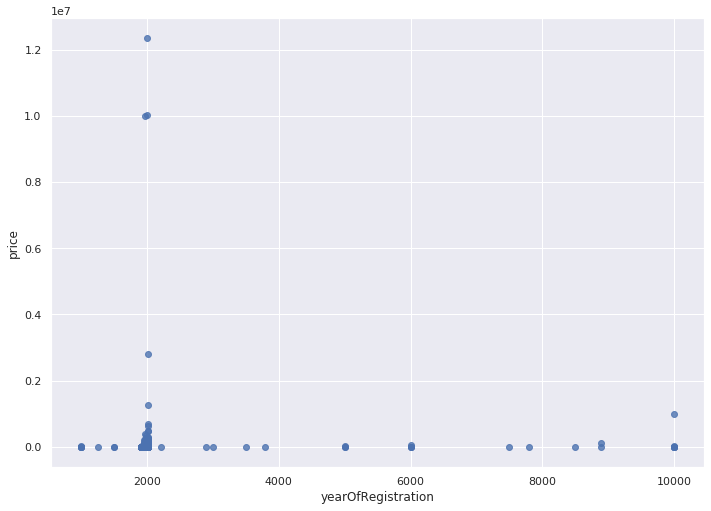

In [18]:
sns.regplot(x = 'yearOfRegistration',y='price',scatter = True,fit_reg=False,data=cars)

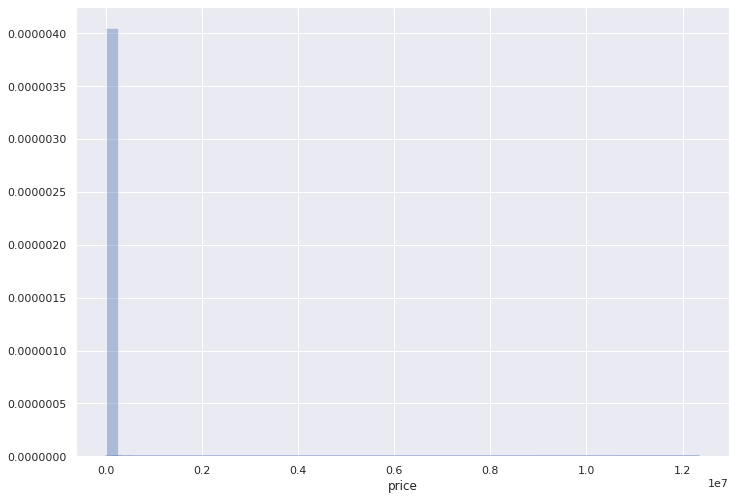

In [19]:
price_count = cars['price'].value_counts().sort_index()
sns.distplot(cars['price'])

In [20]:
cars[['price']].describe()

,price
count,49531.000
mean,6567.220
std,86222.378
min,0.000
25%,1150.000
50%,2950.000
75%,7100.000
max,12345678.000


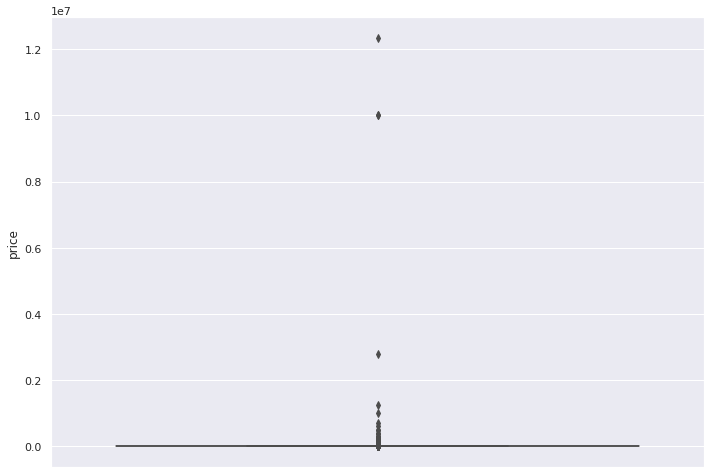

In [21]:
sns.boxplot(y=cars['price'])

In [22]:
sum(cars['price'] > 150000)

34

In [23]:
sum(cars['price'] < 100)

1748

In [24]:
pwercount = cars['powerPS'].value_counts().sort_index()

In [25]:
pwercount

0        5533
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64

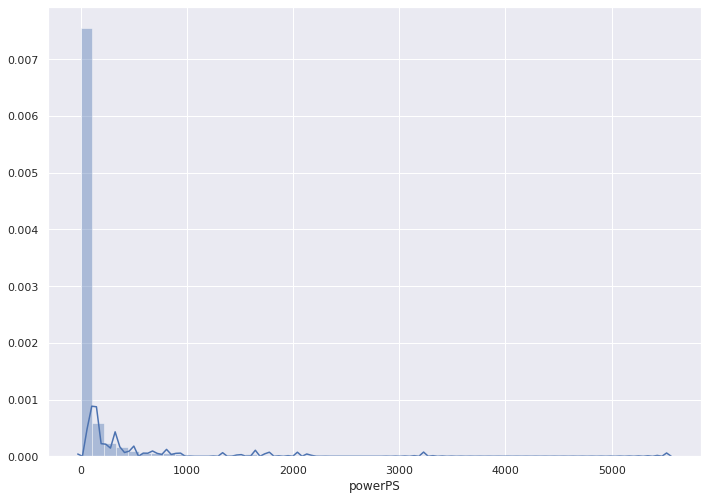

In [26]:
pwercount = cars['powerPS'].value_counts().sort_index()
sns.distplot(pwercount)

In [27]:
cars[['powerPS']].describe()

,powerPS
count,49531.000
mean,116.501
std,231.536
min,0.000
25%,69.000
50%,105.000
75%,150.000
max,19312.000


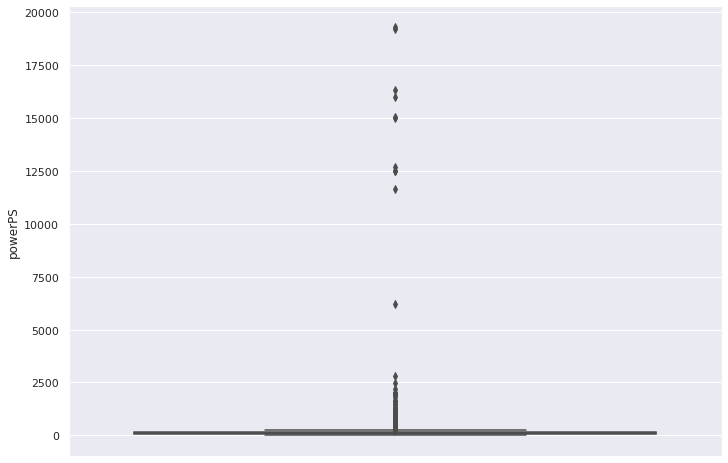

In [28]:
sns.boxplot(y=cars['powerPS'])

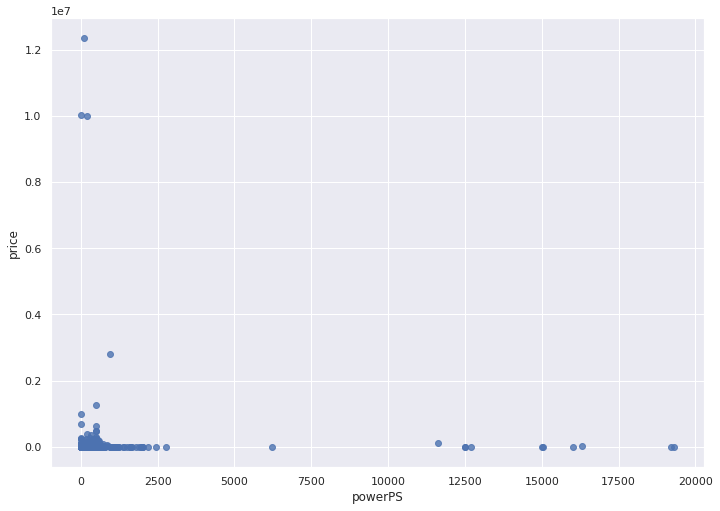

In [29]:
sns.regplot(x='powerPS',y='price',scatter=True,fit_reg=False,data= cars)

In [30]:
sum(cars['powerPS'] > 600)

65

In [31]:
sum(cars['powerPS'] < 10)

5565

In [32]:
#RANGES 

#POWERPS 10 to 500
#PRICE 100 to 150000
#yearRegis 1950 to 2018

cars = cars[
    (cars.yearOfRegistration <= 2020)
    & (cars.yearOfRegistration >= 1950)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
    & (cars.price >= 100)
    & (cars.price <= 150000)
]

In [33]:
cars.shape

(42772, 14)

In [34]:
cars.monthOfRegistration /= 12

In [35]:
cars

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,0.250,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,0.500,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,0.917,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,1.000,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,0.917,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,0.667,petrol,bmw,no
49992,private,offer,790,test,limousine,1998,manual,82,astra,150000,0.750,diesel,opel,no
49993,private,offer,830,test,small car,1999,manual,60,clio,125000,0.667,petrol,renault,no
49995,private,offer,2290,test,station wagon,2001,manual,101,astra,150000,0.250,petrol,opel,no


In [36]:
cars['Age'] = (2020 - cars['yearOfRegistration']) + cars['monthOfRegistration']
cars['Age'] = round(cars['Age'],2)
cars[['Age']].describe()

,Age
count,42772.000
mean,16.873
std,7.093
min,2.000
25%,12.330
50%,16.830
75%,21.170
max,69.750


In [37]:
cars.drop(columns=['yearOfRegistration','monthOfRegistration'],axis = 1)

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,private,offer,4450,test,limousine,manual,150,3er,150000,diesel,bmw,NaN,17.250
1,private,offer,13299,control,suv,manual,163,xc_reihe,150000,diesel,volvo,no,15.500
2,private,offer,3200,test,bus,manual,101,touran,150000,diesel,volkswagen,NaN,17.920
3,private,offer,4500,control,small car,manual,86,ibiza,60000,petrol,seat,no,15.000
4,private,offer,18750,test,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,12.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,manual,231,x_reihe,150000,petrol,bmw,no,16.670
49992,private,offer,790,test,limousine,manual,82,astra,150000,diesel,opel,no,22.750
49993,private,offer,830,test,small car,manual,60,clio,125000,petrol,renault,no,21.670
49995,private,offer,2290,test,station wagon,manual,101,astra,150000,petrol,opel,no,19.250


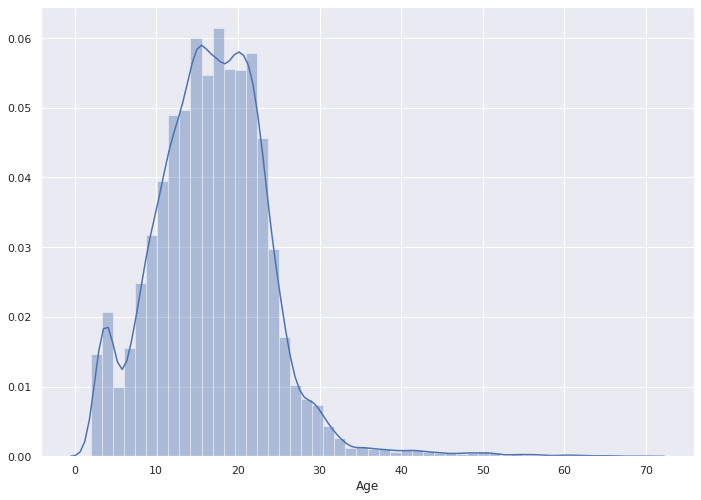

In [38]:
sns.distplot(cars['Age'])

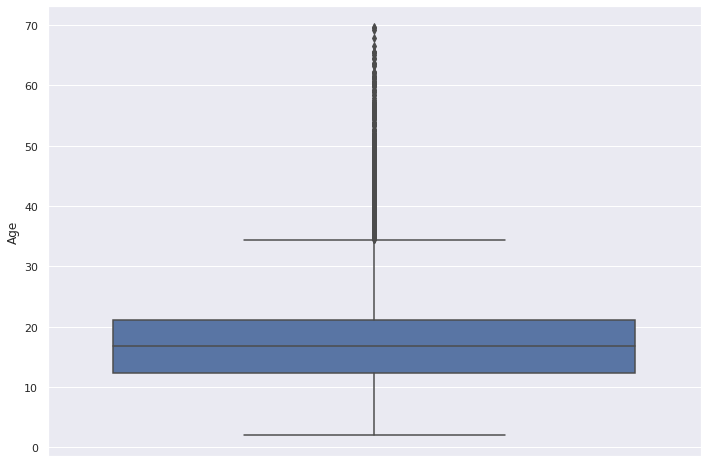

In [39]:
sns.boxplot(y = cars['Age'])

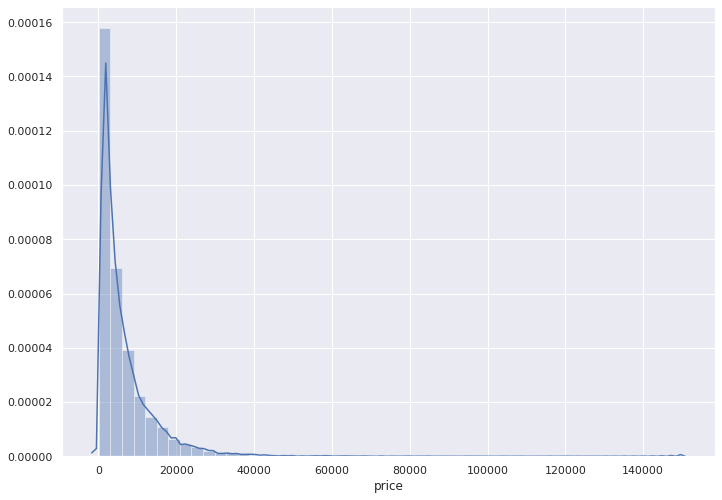

In [40]:
sns.distplot(cars['price'])

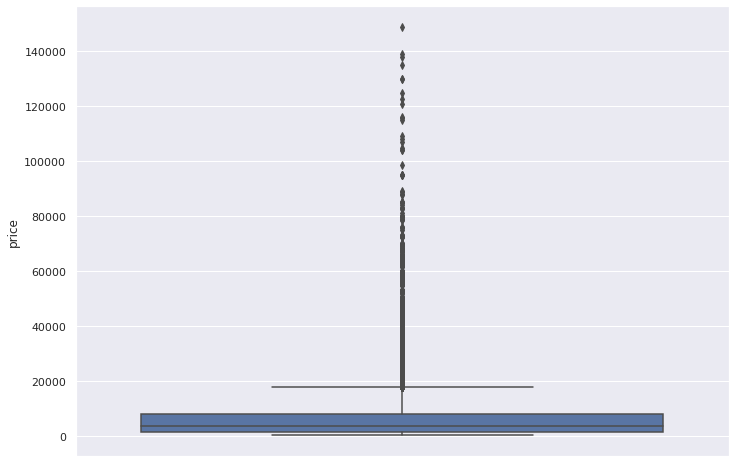

In [41]:
sns.boxplot(y = cars['price'])

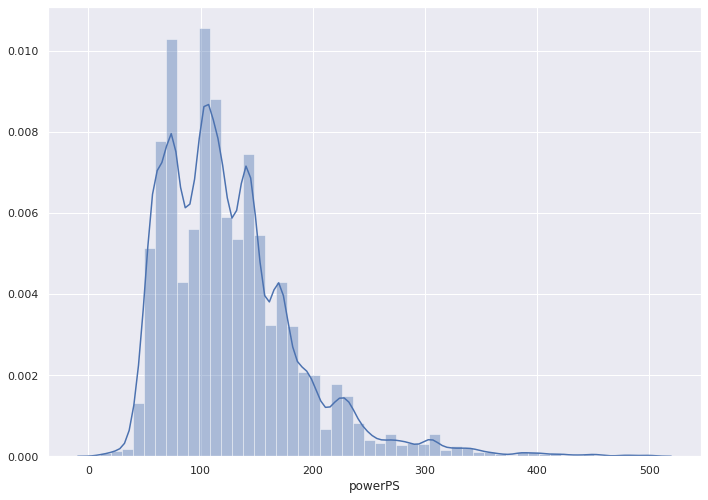

In [42]:
sns.distplot(cars['powerPS'])

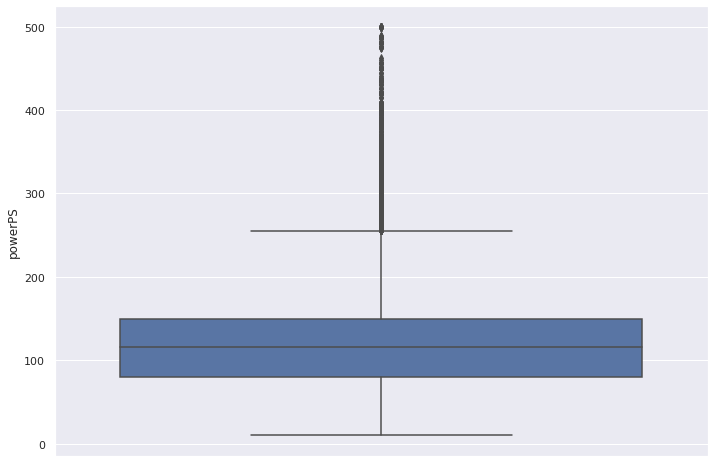

In [43]:
sns.boxplot(y = cars['powerPS'])

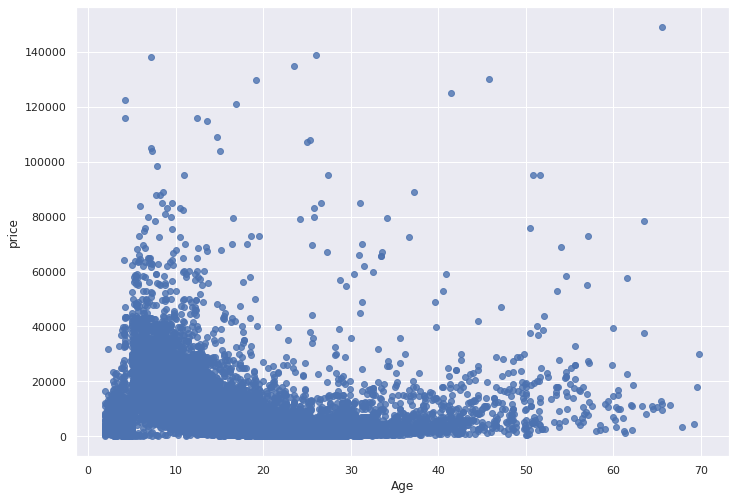

In [44]:
sns.regplot(x = 'Age',y = 'price',scatter=True,fit_reg=False,data = cars)

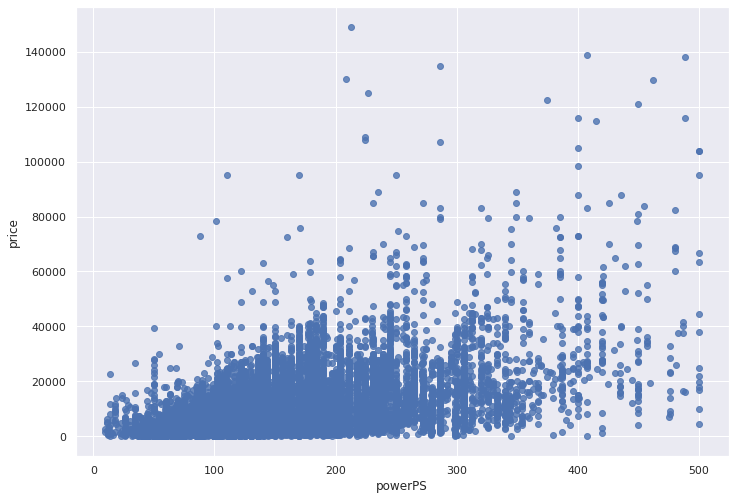

In [45]:
sns.regplot(x = 'powerPS',y = 'price',scatter=True,fit_reg=False,data = cars)

In [46]:
cars['seller'].value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

In [47]:
pd.crosstab(cars['seller'],columns='count',normalize=True)

col_0,count
seller,
commercial,0.000
private,1.000


In [48]:
cars['offerType'].value_counts()

offer    42772
Name: offerType, dtype: int64

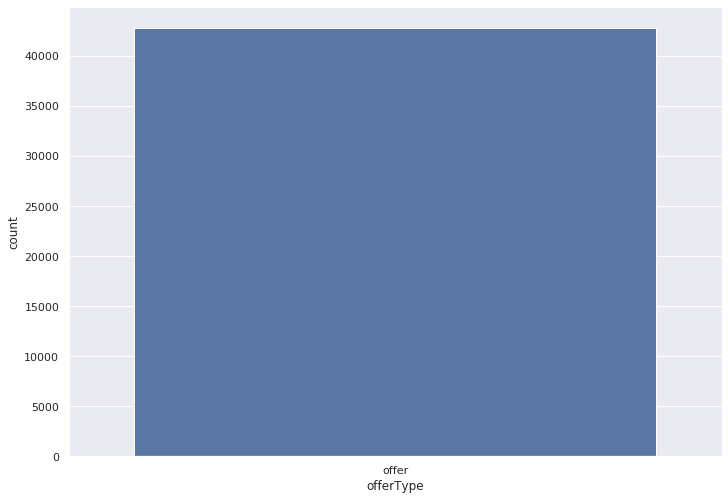

In [49]:
sns.countplot(x = 'offerType',data=cars)

In [50]:
cars['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [51]:
pd.crosstab(cars['abtest'],columns = 'count')

col_0,count
abtest,
control,20644
test,22128


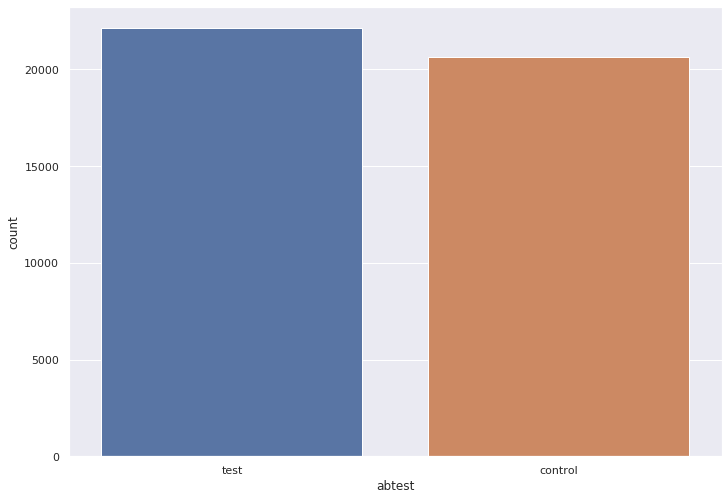

In [52]:
sns.countplot(x = 'abtest',data=cars)

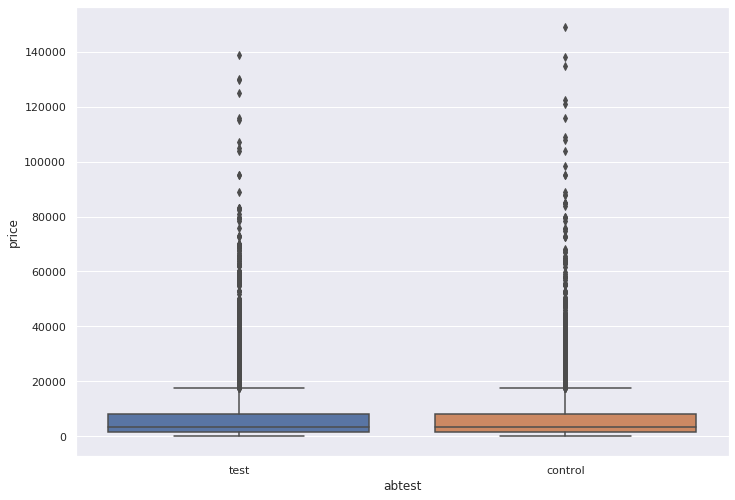

In [53]:
sns.boxplot(x = 'abtest',y = 'price',data = cars)

In [54]:
cars['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

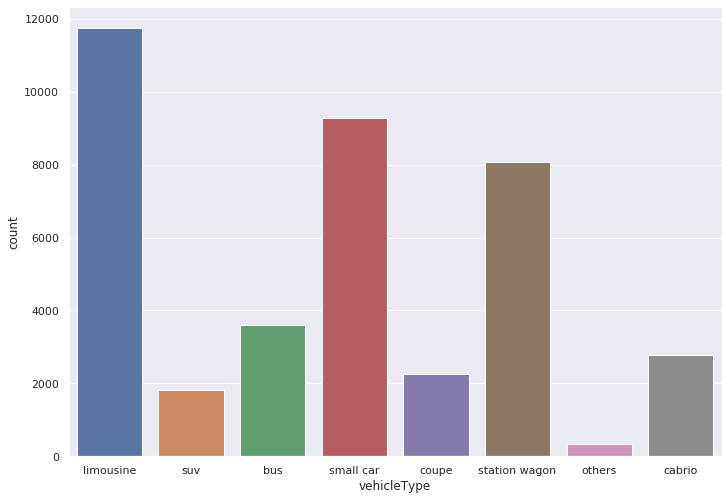

In [55]:
sns.countplot(cars['vehicleType'])

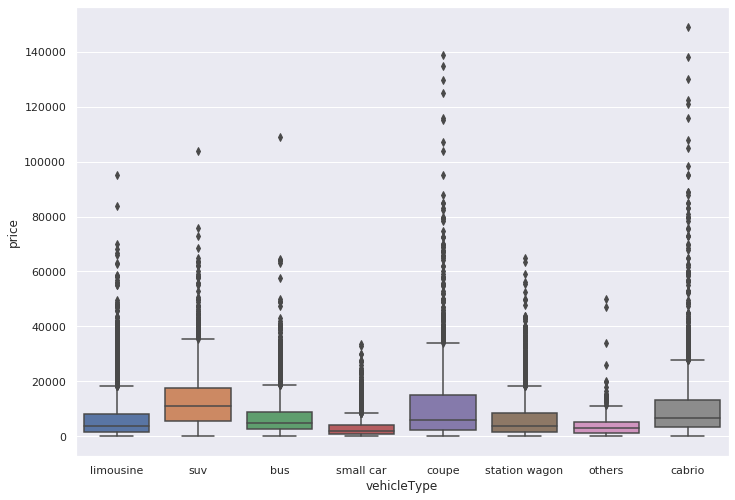

In [56]:
sns.boxplot(x = 'vehicleType', y= "price",data = cars)

In [57]:
cars['gearbox'].value_counts()

manual       32582
automatic     9396
Name: gearbox, dtype: int64

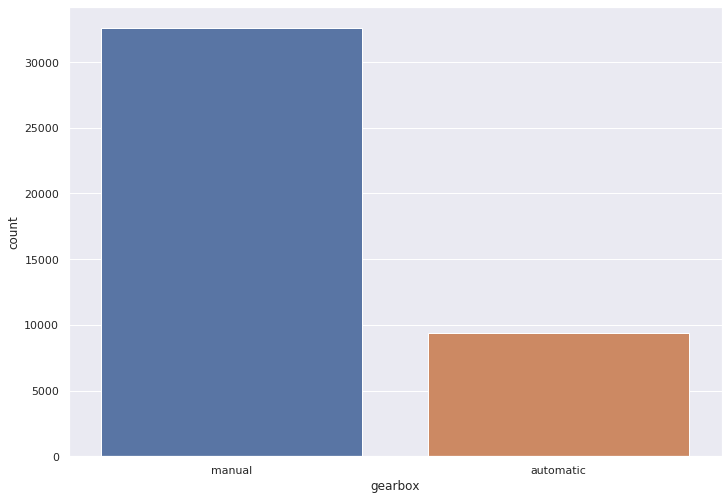

In [58]:
sns.countplot(cars['gearbox'])

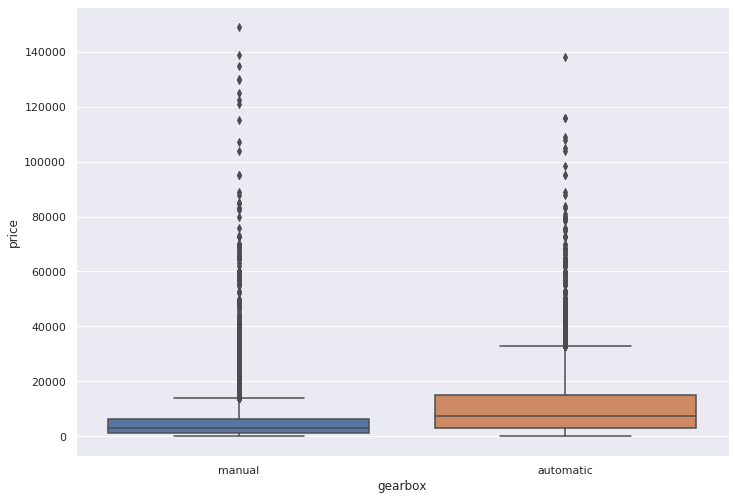

In [59]:
sns.boxplot(x = 'gearbox',y = 'price',data = cars)

In [60]:
cars['model'].value_counts().sort_index()

100         47
145          4
147         58
156         65
159         19
          ... 
yaris      132
yeti        27
ypsilon     22
z_reihe    124
zafira     325
Name: model, Length: 247, dtype: int64

In [61]:
pd.crosstab(cars['model'],columns='count',normalize=True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
...,...
yaris,0.003
yeti,0.001
ypsilon,0.001


In [62]:
cars['kilometer'].value_counts().sort_index()
pd.crosstab(cars['kilometer'],columns='count',normalize=True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


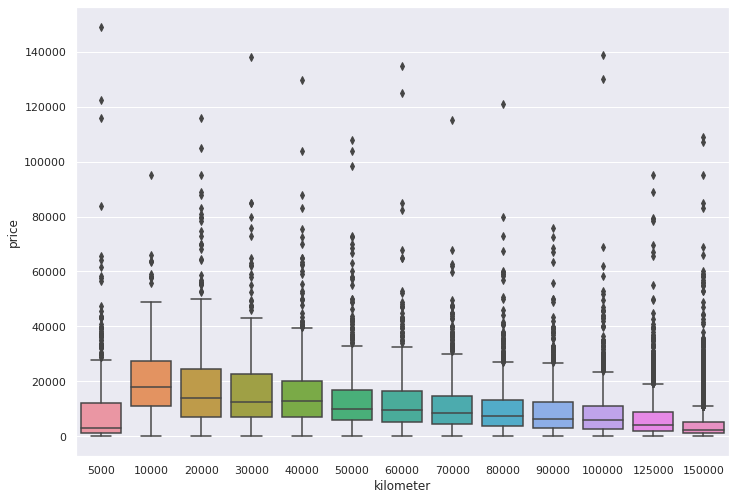

In [63]:
sns.boxplot(x = 'kilometer',y='price',data=cars)

In [64]:
cars['kilometer'].describe()

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

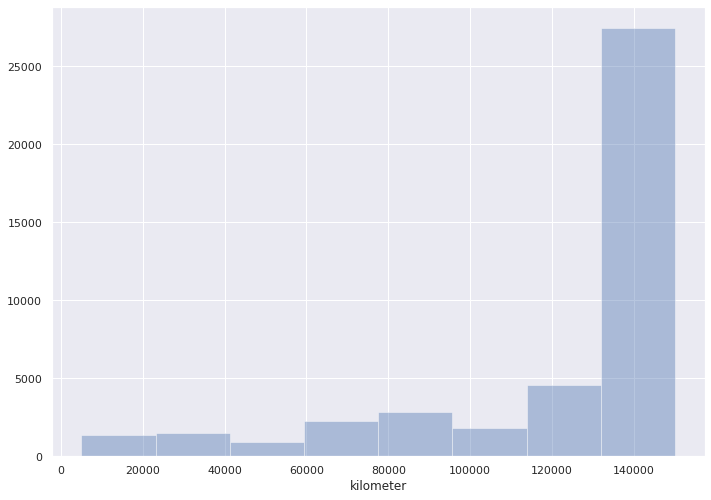

In [65]:
sns.distplot(cars['kilometer'],bins = 8,kde = False)

In [66]:
cars['fuelType'].value_counts()

petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64

In [67]:
pd.crosstab(cars['fuelType'],columns = 'count')

col_0,count
fuelType,
cng,70
diesel,12854
electro,10
hybrid,36
lpg,690
other,6
petrol,26509


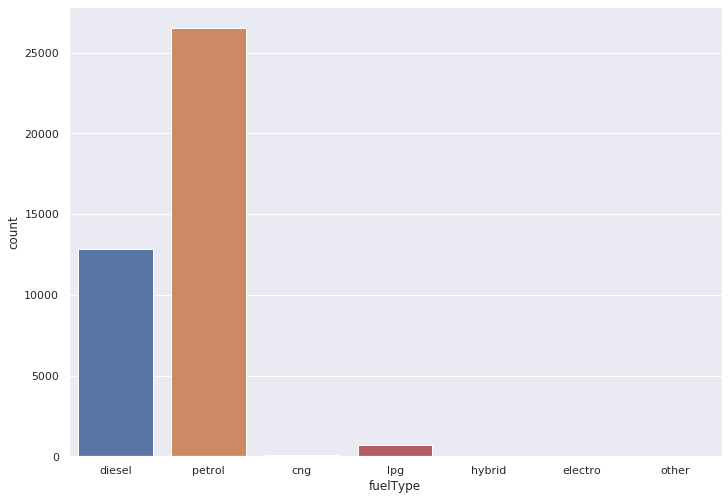

In [68]:
sns.countplot(x = 'fuelType', data=cars)

In [69]:
pd.crosstab(cars['brand'],columns='count')

col_0,count
brand,
alfa_romeo,245
audi,3984
bmw,4868
chevrolet,213
chrysler,151
citroen,598
dacia,123
daewoo,53
daihatsu,67


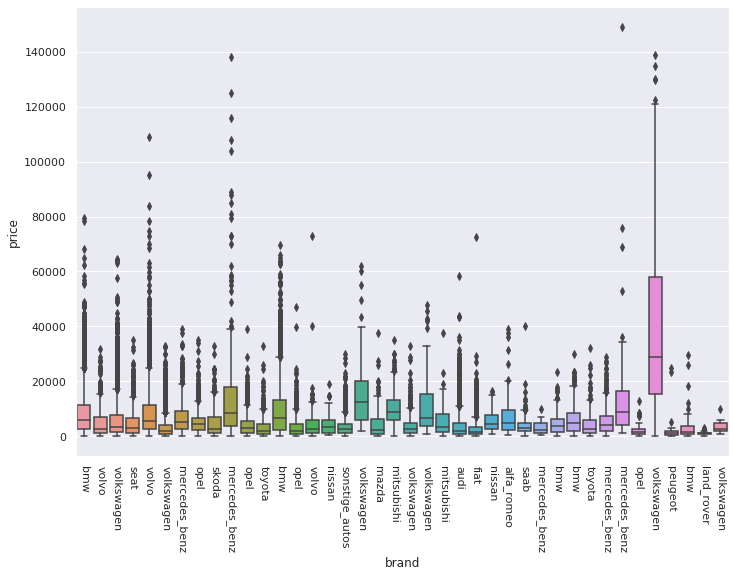

In [70]:
chart = sns.boxplot(x='brand',y = 'price',data=cars)
chart.set_xticklabels(labels = cars['brand'], rotation=-90);

In [71]:
cars['notRepairedDamage'].value_counts()

no     32507
yes     3988
Name: notRepairedDamage, dtype: int64

In [72]:
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)

col_0,count
notRepairedDamage,
no,0.891
yes,0.109


In [73]:
cols = ['seller','offerType','abtest']
cars= cars.drop(columns=cols,axis = 1)

In [74]:
cars_sel = cars.select_dtypes(exclude=[object])
cooree = cars_sel.corr()
round(cooree,3)
cars_sel.corr().loc[:,'price'].abs().sort_values(ascending = False)[1:]

powerPS               0.575
kilometer             0.440
yearOfRegistration    0.338
Age                   0.336
monthOfRegistration   0.050
Name: price, dtype: float64

In [75]:
#EMITTING MISSING VALUES 
cars_omit = cars.dropna(axis=0)

In [76]:
#Dummies
cars_omit = pd.get_dummies(cars_omit,drop_first=True)

In [77]:
cars_omit.shape

(32884, 303)

In [78]:
cars_omit.columns

Index(['price', 'yearOfRegistration', 'powerPS', 'kilometer',
       'monthOfRegistration', 'Age', 'vehicleType_cabrio', 'vehicleType_coupe',
       'vehicleType_limousine', 'vehicleType_others',
       ...
       'brand_seat', 'brand_skoda', 'brand_smart', 'brand_subaru',
       'brand_suzuki', 'brand_toyota', 'brand_trabant', 'brand_volkswagen',
       'brand_volvo', 'notRepairedDamage_yes'],
      dtype='object', length=303)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [80]:
x1 = cars_omit.drop(['price'],axis='columns',inplace=False)
y1 = cars_omit['price']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29b2f7df50>,
      dtype=object)

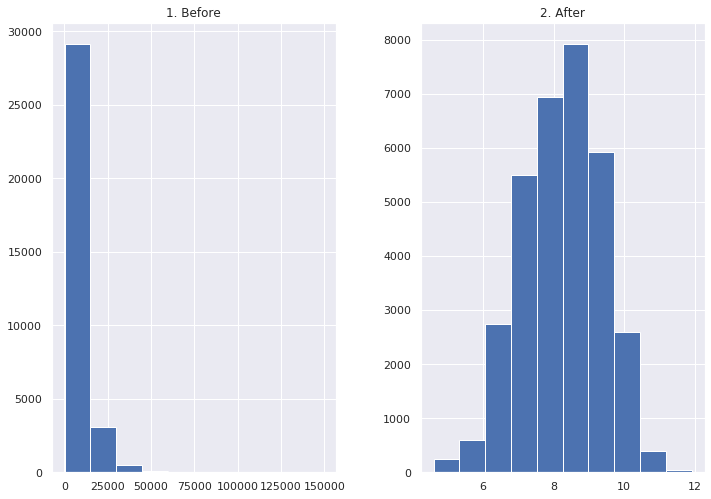

In [81]:
prices = pd.DataFrame({"1. Before":y1,"2. After":np.log(y1)})
prices.hist()

In [82]:
y1 = np.log(y1) #BECAUSE LEFT ONE IS VERY VERY SKEWED

y1.shape,x1.shape

((32884,), (32884, 302))

In [83]:
X_train,X_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state = 3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(23018, 302) (9866, 302) (23018,) (9866,)


In [84]:
#RANDOM FOREST REGRESSOR

rf = RandomForestRegressor(n_estimators=100,max_features='auto',
                          max_depth=100,min_samples_split=10,
                          min_samples_leaf=4,random_state=1)

In [85]:
model_rf1 = rf.fit(X_train,y_train)

In [86]:
car_pred_rf1 = rf.predict(X_test)

In [87]:
car_pred_rf1

array([8.72107393, 9.56526015, 8.1261411 , ..., 9.1807802 , 7.45894045,
       7.75920427])

In [88]:
rf_mse1 = mean_squared_error(y_test,car_pred_rf1)
rf_mse1

0.18951598152374644

In [89]:
rf_rmse1 = np.sqrt(rf_mse1)

In [90]:
rf_rmse1

0.43533433304041896

In [91]:
#R Squeared

r2_rf_test = model_rf1.score(X_test,y_test)
r2_rf_test

0.8509086263167392

In [92]:
r2_rf_train = model_rf1.score(X_train,y_train)
r2_rf_train

0.923310637883268

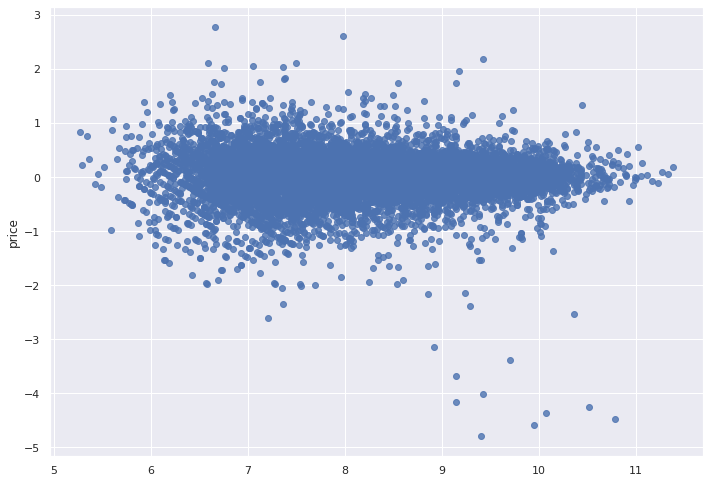

In [93]:
#Reg Diagnosits

#Difference between test data and predicted data

residuals = y_test - car_pred_rf1
sns.regplot(x = car_pred_rf1,y = residuals,scatter=True,fit_reg=False,
           data=cars)
#We want residuals close to Zero
#This tells that predicted and actual values are very very close

In [94]:
residuals.describe()

count   9866.000
mean       0.006
std        0.435
min       -4.787
25%       -0.189
50%        0.028
75%        0.231
max        2.773
Name: price, dtype: float64